# People Analytics
## Predicting Employee Attrition with R

<img src="images/office-and-workers-in-barcelona-spain.jpg" />

<br>

*In this notebook, we will walk through solving a classification problem using machine learning. To do so, we will introduce the Scikit-Learn machine learning library for Python.*

### Table of Contents

<a href="#sectioncase">Case Study: Employee Attrition at IBM</a>

<a href="#sectiondata"> The Dataset </a>

<a href="#sectionlogistic"> Logistic Regression </a>

<ol start="9">
    <li><a href="#section9">Machine Learning</a>
        <ol type=a>
            <br>
            <li><a href="#section9a">The K-Nearest Neighbors Algorithm</a></li>
            <br>
            <li><a href="#section9b">Using Scikit-Learn: An Example</a></li>
            <br>
            <li><a href="#section9c">Using Scikit-Learn: KNN</a></li>            
        </ol>
    </li>
    </ol>

## <a id= "sectioncase">Case Study: Employee Attrition at IBM </a>

*Employee attrition* refers to a decrease in employees at a company where the company does not intend to fill the vacancy afterward. Attrition, caused by resignations, retirements, or the elimination of job positions, is important for businesses to anticipate so they can keep costs low and properly distribute workloads.

Today, we'll try to predict whether or not an employee will leave their job using [a data set created by IBM](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home). Because employee data is confidential, IBM's data set is fictional- it does not represent real employees. However, the data and the problem are structured very similarly to how actual companies such as IBM are approaching this very real problem.

<div class="alert alert-info">
    <b>NOTE</b>: we've made some changes to the data set to make this assignment simpler- things like renaming values, dropping confusing features, and adding definitions for columns. Please refer to the data dictionary below and <b>not</b> the one at the link when completing this assignment.
    </div>

Run the following cell to load the data.

In [47]:
# dependencies
install.packages("corrplot")
library(corrplot)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


## <a name="sectiondata"> The Dataset </a>


In [46]:
# load the dataset
hr = read.csv("data/HR-Employee-Attrition.csv")

# show the first 6 rows of the dataset
head(hr)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [7]:
names(hr)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

This data set contains a wealth of information that could be used to predict attrition. Here's the **data dictionary**: the information about each feature (column) contained in the data set.


* `Age`: employee's age
* `Attrition`: the **response variable**. 1 if employee left IBM due to normal life circumstances, 0 if the employee stayed with IBM
* `BusinessTravel`: the amount of travel the employee does for business. 0 (no travel), 1 (rare travel), or 2 (frequent travel)
* `Department`: employee's home department. 'Sales', 'Research & Development', or 'Human Resources'
* `DistanceFromHome`: number of miles the employee has to travel to work
* `Education`: employee's highest level of education. 1 (below college), 2 (some college), 3 (bachelor's degree), 4 (master's degree), 5 (doctorate)
* `Gender`: 1 (female) or 0 (male)
* `JobRole`: 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', or 'Human Resources'
* `JobSatisfaction`: the employee's ranking of their satisfaction with their job. Minimum is 1, maximum is 4.
* `MaritalStatus`: 'Single', 'Married', or 'Divorced'
* `MonthlyIncome`: in dollars
* `NumCompaniesWorked`: the total number of companies the employee has worked at in their lifetime
* `OverTime`: whether or not the employee is eligible for overtime. 1 (yes) or 0 (no)
* `PercentSalaryHike`: for the employee's most recent salary increase, the percentage by which their salary increased
* `WorkLifeBalance`: employee's rating of their work-life balance. 1 (bad), 2 (good), 3 (better), 4 (best)
* `YearsAtCompany`: number of years employee has worked for IBM
* `YearsInCurrentRole`: number of years employee has worked for IBM in their current position

In [3]:
summary(hr)

      Age        Attrition            BusinessTravel   DailyRate     
 Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00              Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                       Mean   : 802.5  
 3rd Qu.:43.00                                       3rd Qu.:1157.0  
 Max.   :60.00                                       Max.   :1499.0  
                                                                     
                  Department  DistanceFromHome   Education    
 Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
 Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
 Sales                 :446   Median : 7.000   Median :3.000  
                              Mean   : 9.193   Mean   :2.913  
                              3rd Qu.:14.000   3rd Qu.:4.000  
                              Max.   :29.000   Max.   :5.000  

In [41]:
# replace the ... with the name of the column you want to visualize
# capitalization counts!
my_column = "..."

# run this cell to see the distribution of values for your column
hist(hr[, my_column])

boxplot(hr[,my_column])

ERROR: Error in `[.data.frame`(hr, , my_column): undefined columns selected


Warning message in cor(numeric_data):
“the standard deviation is zero”

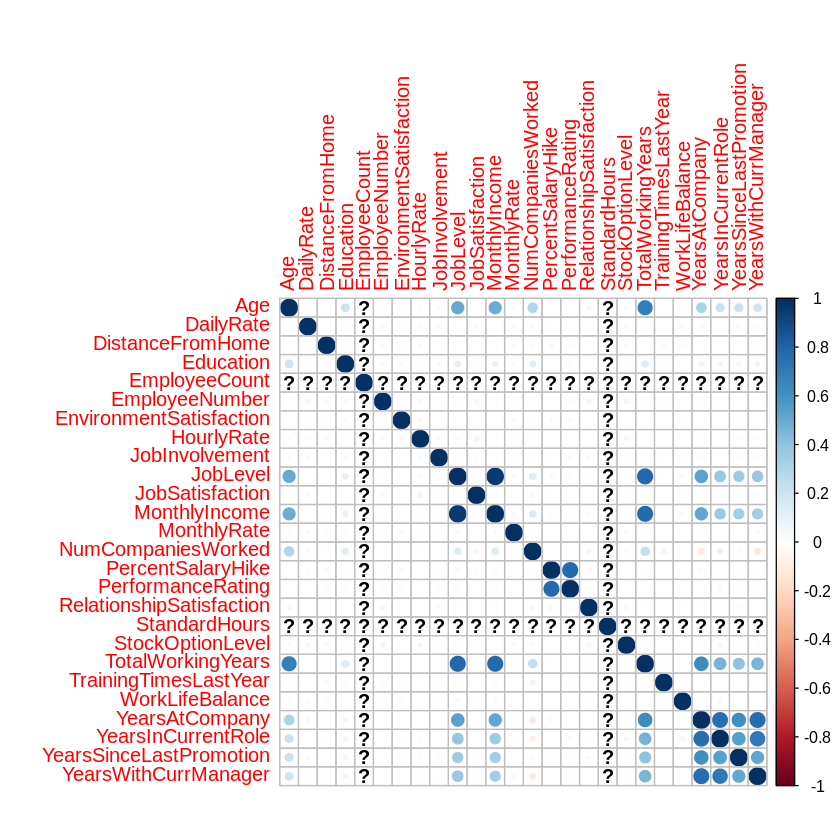

In [52]:
library(corrplot)
correlations <- cor(numeric_data)
corrplot(correlations, method="circle")

## <a class="sectionlogistic"> Logistic Regression </a>

In [51]:
numeric_data = hr[,sapply(hr,is.integer)]
head(numeric_data)

Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
41,1102,1,2,1,1,2,94,3,2,⋯,1,80,0,8,0,1,6,4,0,5
49,279,8,1,1,2,3,61,2,2,⋯,4,80,1,10,3,3,10,7,1,7
37,1373,2,2,1,4,4,92,2,1,⋯,2,80,0,7,3,3,0,0,0,0
33,1392,3,4,1,5,4,56,3,1,⋯,3,80,0,8,3,3,8,7,3,0
27,591,2,1,1,7,1,40,3,1,⋯,4,80,1,6,3,3,2,2,2,2
32,1005,2,2,1,8,4,79,3,1,⋯,3,80,0,8,2,2,7,7,3,6


In [60]:
# fit the model
glm.fit = glm(Attrition ~ DistanceFromHome + HourlyRate + YearsAtCompany, data = hr, family = binomial)

In [61]:
# show some summary statistics about the fit model
summary(glm.fit)


Call:
glm(formula = Attrition ~ DistanceFromHome + HourlyRate + YearsAtCompany, 
    family = binomial, data = hr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9345  -0.6385  -0.5597  -0.4126   2.8843  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.288824   0.270673  -4.762 1.92e-06 ***
DistanceFromHome  0.026363   0.008462   3.116  0.00184 ** 
HourlyRate       -0.001734   0.003540  -0.490  0.62421    
YearsAtCompany   -0.082458   0.016075  -5.130 2.90e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1298.6  on 1469  degrees of freedom
Residual deviance: 1256.9  on 1466  degrees of freedom
AIC: 1264.9

Number of Fisher Scoring iterations: 5


In [62]:
# use the model to predict attrition
glm.probs = predict(glm.fit,type = "response")

In [63]:
# show the probabilities of attrition for each employee in the dataset
glm.probs

1          2          3          4          5          6          7 
0.12783583 0.11833527 0.19850688 0.12276342 0.18688405 0.12451941 0.19268296 
         8          9         10         11         12         13         14 
0.29843343 0.18229051 0.21127577 0.19388108 0.15180930 0.25550962 0.24710123 
        15         16         17         18         19         20         21 
0.25489767 0.16134843 0.14301154 0.24676021 0.03128544 0.17342942 0.18314932 
        22         23         24         25         26         27         28 
0.16713660 0.10104253 0.25733397 0.16736428 0.08226167 0.13985874 0.12973696 
        29         30         31         32         33         34         35 
0.04782525 0.17581545 0.18941276 0.19370211 0.11711058 0.20807183 0.17753060 
        36         37         38         39         40         41         42 
0.14513790 0.16710888 0.17232482 0.20073952 0.14835140 0.19846726 0.20168638 
        43         44         45         46         47         48         49 
0.31099867 0.13190612 0.08686384 0.05357951 0.17516348 0.26953379 0.11213765 
        50         51         52         53         54         55         56 
0.22744182 0.18021685 0.19644874 0.15156694 0.18760139 0.28314714 0.06481011 
        57         58         59         60         61         62         63 
0.15715562 0.28916949 0.14619844 0.12695944 0.11286420 0.19222897 0.03213278 
        64         65         66         67         68         69         70 
0.07357290 0.07030420 0.17545615 0.15998552 0.21601122 0.16153606 0.21908198 
        71         72         73         74         75         76         77 
0.15562510 0.14427931 0.18305249 0.09961570 0.21273961 0.10999934 0.07210300 
        78         79         80         81         82         83         84 
0.22779050 0.17241589 0.16443627 0.10133989 0.14073042 0.18750274 0.08789547 
        85         86         87         88         89         90         91 
0.13731489 0.15656515 0.20691471 0.17539262 0.08990232 0.12958059 0.03872383 
        92         93         94         95         96         97         98 
0.15670988 0.09978030 0.10373370 0.10078206 0.15842596 0.18029646 0.15839276 
        99        100        101        102        103        104        105 
0.01566864 0.25998484 0.18433034 0.18723868 0.20956205 0.07439376 0.18362402 
       106        107        108        109        110        111        112 
0.17668522 0.11418114 0.15039155 0.20097791 0.26978707 0.08421250 0.12337329 
       113        114        115        116        117        118        119 
0.25583966 0.21135730 0.21565868 0.14518117 0.10507289 0.13005118 0.20426787 
       120        121        122        123        124        125        126 
0.05602049 0.15795197 0.18987826 0.18894181 0.05374554 0.13709189 0.16483110 
       127        128        129        130        131        132        133 
0.01561460 0.31097734 0.17158401 0.10294487 0.28436652 0.21909901 0.25929894 
       134        135        136        137        138        139        140 
0.12344873 0.19857816 0.17891733 0.18247489 0.07573555 0.31288122 0.11487959 
       141        142        143        144        145        146        147 
0.17727023 0.23812410 0.18055292 0.20478500 0.14530371 0.17507718 0.15328214 
       148        149        150        151        152        153        154 
0.14676287 0.16425965 0.19322309 0.08736868 0.09534412 0.14593863 0.07193110 
       155        156        157        158        159        160        161 
0.13071915 0.10357257 0.22344412 0.22027113 0.09203282 0.15498829 0.25131955 
       162        163        164        165        166        167        168 
0.21159669 0.22787809 0.22928576 0.19322309 0.18197284 0.14691773 0.11378054 
       169        170        171        172        173        174        175 
0.11666001 0.16554858 0.20728125 0.19218264 0.12770260 0.10381708 0.16142140 
       176        177        178        179        180        181        182 
0.20439743 0.16252530 0.1978053

In [83]:
# create a categorical variable: "Yes" if probability of attrition is > 0.1, "No" otherwise
glm.pred = ifelse(glm.probs > 0.1, "Yes", "No")

In [84]:
# show the categorical predictions for each employee
glm.pred

1     2     3     4     5     6     7     8     9    10    11    12    13 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
"Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
"Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
"Yes" "Yes" "Yes" "Yes" "Yes"  "No"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
"Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No"  "No"  "No" 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes"  "No" "Yes" 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
"Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes"  "No" "Yes"  "No" 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
"Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes"  "No" 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
"Yes" "Yes"  "No" "Yes" "Yes" "Yes"  "No" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No"  "No" "Yes"  "No" "Yes" "Yes" 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
"Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
"Yes" "Yes" "Yes" "Yes"  "No"  "No" "Yes" "Yes"  "No" "Yes" "Yes" "Yes"  "No" 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
"Yes" "Yes"  "No"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes"  "No" 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
"Yes" "Yes"  "No" "Yes" "Yes" "Yes"  "No"  "No" "Yes" "Yes"  "No" "Yes" "Yes" 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
"Yes"  "No" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
 "No" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No"  "No"  "No" "Yes" "Yes" 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes"  "No" 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
"Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
"Yes"  "No" "Yes" "Yes" "Yes"  "No" "Yes"  "No" "Yes" "Yes" "Yes" "Yes"  "No" 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
"Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes" "Yes" 
  326   327   328   329   330   331   332   333   334 

In [85]:
# create a confusion matrix for our predictions (rows) vs the actual values (columns)
table(glm.pred, hr[, "Attrition"])

        
glm.pred   No  Yes
     No   196   17
     Yes 1037  220